![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

# Exploration

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
penguins_df.info()
penguins_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
penguins_df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

# Preprocessing

In [4]:
penguins = pd.get_dummies(penguins_df, drop_first=True)
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,True
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,False
328,46.8,14.3,215.0,4850.0,False
329,50.4,15.7,222.0,5750.0,True
330,45.2,14.8,212.0,5200.0,False


In [5]:
# Standardise the data scale
scaler = StandardScaler()

X = penguins.to_numpy()
X_transformed = scaler.fit_transform(X)
print(X_transformed)

[[-0.90390586  0.79035987 -1.42534179 -0.56694801  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985  0.99399394]]


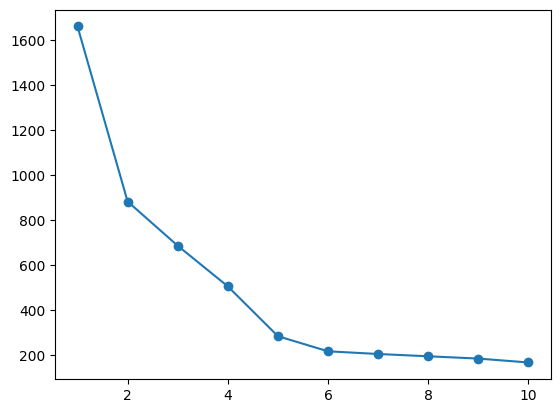

In [6]:
# Search for the optimal number for KMeans
import numpy as np
k = np.arange(1, 11)
n_inertia = {}
for n in k:
    km = KMeans(n_clusters=n)
    km.fit(X_transformed)
    n_inertia[n] = km.inertia_

# Visualise intertia to evaluate the best hyperparameter for the model
plt.plot(n_inertia.keys(), n_inertia.values(), '-o')
plt.show()

A good clusters usually has low inertia (tight clusters), but the inertia tends to decrease as the hyperparameter in K-Means increases. We will choose the number of clusters for the model where the inertia starts to decrease more slowly. In our case, **_when n = 3_**.

# Predict the labels

In [7]:
# Fit and predict the label 
model = KMeans(n_clusters=3)
label = model.fit_predict(X)

# Dataframe with predicted labels
penguins_df['label'] = label
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,2
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,2
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,1
328,46.8,14.3,215.0,4850.0,FEMALE,1
329,50.4,15.7,222.0,5750.0,MALE,1
330,45.2,14.8,212.0,5200.0,FEMALE,1


In [8]:
stat_penguins = penguins_df.groupby('label')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,44.329464,17.415179,201.580357,4309.821429
1,48.662500,15.397500,219.987500,5365.937500
2,41.122143,17.946429,189.628571,3461.250000


# Visualisation - Clusters Stats

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Culmen Length', x=stat_penguins.index, y=stat_penguins['culmen_length_mm']),
    go.Bar(name='Culmen Depth', x=stat_penguins.index, y=stat_penguins['culmen_depth_mm']),
    go.Bar(name='Flipper Length',x=stat_penguins.index, y=stat_penguins['flipper_length_mm'])
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [12]:
mass_fig = go.Figure(data=[
    go.Bar(name='Body Mass', x=stat_penguins.index, y=stat_penguins['body_mass_g'])
])

mass_fig.update_layout(barmode='group')
mass_fig.show()